In [18]:
import pandas as pd  
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sb

import requests
import json
from bs4 import BeautifulSoup
from requests.auth import HTTPBasicAuth #authentication code
from getpass import getpass
from IPython.display import display, Image, SVG, Math, YouTubeVideo

import time

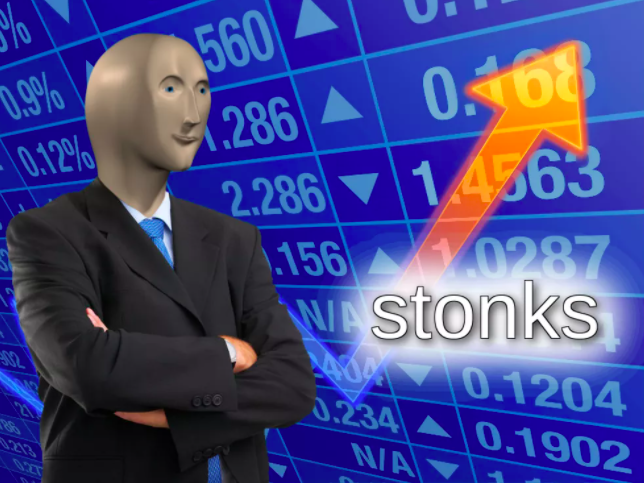

In [19]:
Image(filename='stonks.png')

In [20]:
#scrape 1 page
url = 'http://eoddata.com/symbols.aspx'

response = requests.get(url)
html = response.content
soup = BeautifulSoup(html, "lxml")
table = soup.find_all('td')

rows = [row.text.strip().split("\n") for row in table]
#rows

In [21]:
list_rows = sum(rows, [])
list_rows = list_rows[59:]
while '' in list_rows: list_rows.remove('') 

In [22]:
new_list = []
for i in range(0, len(list_rows), 8):
    new_list.append(list_rows[i : i+8])

columns =["Code","Name", "High", "Low", "Close", "Volume","High Change", "Low Change"]

df = pd.DataFrame(new_list)
df.columns = columns 
df =df[:-6]

In [23]:
df.dtypes

Code           object
Name           object
High           object
Low            object
Close          object
Volume         object
High Change    object
Low Change     object
dtype: object

In [24]:
df["Volume"] = df["Volume"].str.replace(",","")
cols = ["High", "Low", "Close", "Volume","High Change", "Low Change"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [25]:
df

Code                    Name    High     Low   Close    Volume  \
0       A    Agilent Technologies   98.47   95.86   97.93    954400   
1      AA              Alcoa Corp   14.40   14.05   14.10   3084100   
2     AAN             Aaron's Inc   55.81   53.95   55.15    463000   
3     AAP  Advance Auto Parts Inc  155.70  152.60  154.40    715900   
4     AAT   American Assets Trust   26.12   25.24   25.30    222700   
..    ...                     ...     ...     ...     ...       ...   
284   AZN         Astrazeneca Plc   54.82   53.34   53.64  11416200   
285   AZO                Autozone     NaN     NaN     NaN    199900   
286  AZRE  Azure Power Global Ltd   28.99   27.10   27.39    122900   
287  AZUL           Azul S.A. ADR   15.00   14.59   14.88   2230700   
288   AZZ                 Azz Inc   34.96   33.93   34.04    186700   

     High Change  Low Change  
0           2.79        2.93  
1          -0.13        0.91  
2          -0.14        0.25  
3           2.60        1.73  
4          -0.62        2.39  
..           ...         ...  
284        -1.07        1.96  
285        22.00        1.78  
286         0.09        0.33  
287         0.16        1.09  
288        -0.49        1.42  

[289 rows x 8 columns]

### Do IT for the loop

In [26]:
#web scrape multiple pages

def scrape_machine(url):  
    df = pd.DataFrame([])
    try:
        response = requests.get(url)
        html = response.content
        soup = BeautifulSoup(html, "lxml")
        table = soup.find_all('td')
        rows = [row.text.strip().split("\n") for row in table]
        list_rows = sum(rows, [])
        list_rows = list_rows[59:]
        while '' in list_rows: list_rows.remove('') 
        
        new_list = []
        for i in range(0, len(list_rows), 8):
            new_list.append(list_rows[i : i+8])

        columns =["Code","Name", "High", "Low", "Close", "Volume","High Change", "Low Change"]

        page = pd.DataFrame(new_list)
        page.columns = columns 
        page =page[:-6]
        
        page["Volume"] = page["Volume"].str.replace(",","")
        cols = ["High", "Low", "Close", "Volume","High Change", "Low Change"]
        page[cols] = page[cols].apply(pd.to_numeric, errors='coerce')

        df = df.append(page, sort=False )
        return df
    except ValueError:
        pass

In [27]:
import string
alphabet_string = list(string.ascii_uppercase)

In [28]:
url = 'http://eoddata.com/symbols.aspx'

df_final = pd.DataFrame([])

for i in alphabet_string:
    df = scrape_machine(url+"/"+str(i))
    df_final = df_final.append(df)

In [29]:
df_final['Intraday Change %'] = (df_final['High']/df_final['Low']-1)*100
df_final

Code                    Name    High     Low   Close    Volume  \
0       A    Agilent Technologies   98.47   95.86   97.93    954400   
1      AA              Alcoa Corp   14.40   14.05   14.10   3084100   
2     AAN             Aaron's Inc   55.81   53.95   55.15    463000   
3     AAP  Advance Auto Parts Inc  155.70  152.60  154.40    715900   
4     AAT   American Assets Trust   26.12   25.24   25.30    222700   
..    ...                     ...     ...     ...     ...       ...   
284   AZN         Astrazeneca Plc   54.82   53.34   53.64  11416200   
285   AZO                Autozone     NaN     NaN     NaN    199900   
286  AZRE  Azure Power Global Ltd   28.99   27.10   27.39    122900   
287  AZUL           Azul S.A. ADR   15.00   14.59   14.88   2230700   
288   AZZ                 Azz Inc   34.96   33.93   34.04    186700   

     High Change  Low Change  Intraday Change %  
0           2.79        2.93           2.722721  
1          -0.13        0.91           2.491103  
2          -0.14        0.25           3.447637  
3           2.60        1.73           2.031455  
4          -0.62        2.39           3.486529  
..           ...         ...                ...  
284        -1.07        1.96           2.774653  
285        22.00        1.78                NaN  
286         0.09        0.33           6.974170  
287         0.16        1.09           2.810144  
288        -0.49        1.42           3.035662  

[7514 rows x 9 columns]

In [30]:
low_prices_high_variation = df_final.loc[(df_final['Close'] <10) & (df_final['Intraday Change %'] > 5)]
low_prices_high_variation

Code                                 Name    High    Low  Close  \
19     ACB                  Aurora Cannabis Inc   7.990  7.400   7.65   
60     AFI               Armstrong Flooring Inc   3.890  3.690   3.83   
82     AHC                       A.H. Belo Corp   1.480  1.390   1.40   
88     AHT        Ashford Hospitality Trust Inc   2.570  2.320   2.49   
89   AHT-D  Ashford Hospitality TR Inc [Aht/Pd]   6.450  5.215   5.30   
..     ...                                  ...     ...    ...    ...   
211   ARLO                Arlo Technologies Inc   5.545  5.110   5.34   
224    ASC                Ardmore Shipping Corp   3.600  3.410   3.48   
230   ASPN                   Aspen Aerogels Inc   9.280  8.675   8.94   
247    ATI           Allegheny Technologies Inc   9.140  8.605   8.77   
251   ATTO                          Atento S.A.  10.170  9.650   9.71   

      Volume  High Change  Low Change  Intraday Change %  
19   5585300         0.13        1.73           7.972973  
60    104200         0.08        2.13           5.420054  
82     69300        -0.07        4.77           6.474820  
88   1017700        -0.44       15.02          10.775862  
89     32500         0.20        3.92          23.681687  
..       ...          ...         ...                ...  
211  1155700         0.24        4.71           8.512720  
224   307500         0.05        1.46           5.571848  
230   171800         0.47        5.55           6.974063  
247  2307300        -0.25        2.77           6.217316  
251    11200        -0.18        1.82           5.388601  

[546 rows x 9 columns]

In [31]:
low_prices_high_variation.to_csv('Low Priced High Variation.csv')